<a href="https://colab.research.google.com/github/antfolk/BMEN35_2023/blob/main/Session4/BMEN35_Ex11_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural networks
In this notebook we will have a look at neural network. The "old school" kind, shallow networks.

As usual, we will start by import some libraries / modules, generating some data and visualising it.

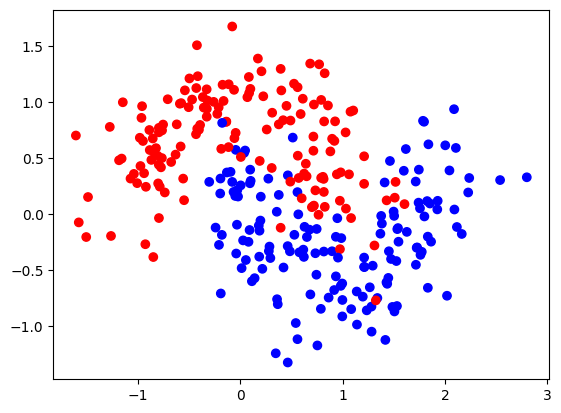

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 300, noise=0.3, random_state=0)
c = np.array(['r','b'])
plt.scatter(X[:, 0], X[:, 1], c=c[y])
plt.show()

So, we have two classes ("red" and "blue") and two features and from the scatter-plot and it  looks like they are not linearly separable.

What we can do is to use a neural network. We will use 1 hidden layer.

Lets start with some bokkkeeping.

In [2]:
input_dim = X.shape[1] # Input dimensions, number of "features", 2 in this case
num_classes = np.size(np.unique(y)) # Number of classes (2), binary in this case
hidden_layer_size = 64 # no of neurons in hidden layer
# initialize parameters
W1 = 0.01 * np.random.randn(input_dim,hidden_layer_size) #  Weigths for input layer
b1 = np.zeros((1,hidden_layer_size))             #  biases for input layer
W2 = 0.01 * np.random.randn(hidden_layer_size,num_classes) #  Weigths for hidden layer
b2 = np.zeros((1,num_classes))             #  biases for hidden layer

eta = 0.1 # Learning rate
iterations = 25000 # How many times we will run our loop, same as epochs
num_examples = X.shape[0]
loss = np.zeros(iterations)

Now we have finished with our assigning of parameters and set other things. Let start with our algorithm.

In [3]:
for i in range(iterations):
  L0 = X # Input layer
  L1_in = np.dot(L0, W1) + b1 # Hidden layer input
  L1_out = np.maximum(0, L1_in) # Hidden layer output, we use ReLU activation function here
  L2_in = np.dot(L1_out, W2) + b2 # Output layer input
  L2_out = np.exp(L2_in)/ np.sum(np.exp(L2_in), axis=1, keepdims=True) # Output layer output, there is also a softmax function in scipy.special

  cost =  -np.log(L2_out[range(num_examples),y])
  loss[i] = np.sum(cost)/num_examples

  # compute the gradient on L2out (6.26b in the book)
  dL2out = L2_out
  dL2out[range(num_examples),y] -= 1
  dL2out = dL2out / num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(L1_out.T, dL2out)
  db2 = np.sum(dL2out, axis=0, keepdims=True)
  # next backprop into hidden layer
  dL1 = np.dot(L2_out, W2.T)
  # backprop through ReLU non-linearity
  dL1[L1_out <= 0] = 0
  # finally into W,b
  dW1 = np.dot(X.T, dL1)
  db1 = np.sum(dL1, axis=0, keepdims=True)


  # update weights and biases
  W1 = W1 -eta * dW1
  b1 = b1 -eta * db1
  W2 = W2 -eta * dW2
  b2 = b2 -eta * db2

Now that we have finished, lets check the loss.

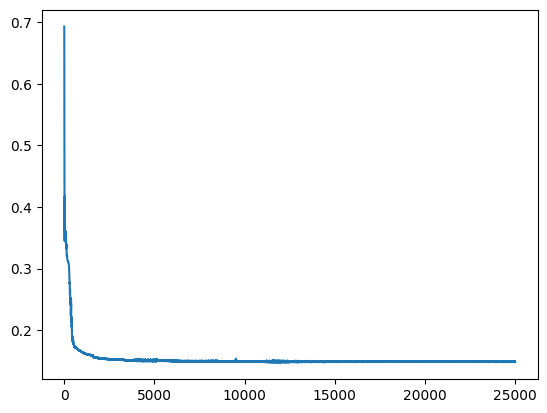

In [4]:
plt.plot(loss)

Alright, looks ok. The loss seems to have decreased. Lets check what we have for training accuracy. We will do a forward pass of the whole training dataset.

In [5]:
L1_out = np.maximum(0, np.dot(X, W1) + b1)
L2_out = np.dot(L1_out, W2) + b2
y_hat = np.argmax(L2_out, axis=1)
accuracy = np.sum(y_hat==y)/y.size # Calculate the classification accuracy
print(accuracy)


0.94


We seem to go quite good accuracy even though the data was not linearly separable. That is it for the introduction to neural networks tutorial.

##The end